<a href="https://colab.research.google.com/github/Vothuw/homeworkAl/blob/main/FACE_AND_EMOTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import load_img,img_to_array,to_categorical
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,BatchNormalization,Dropout
from keras.models import Sequential, load_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
train_face = '/content/drive/MyDrive/face'
val_face = '/content/drive/MyDrive/face'

train_data = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest',
    validation_split=0.2,
    brightness_range=[0.8,1.2],
)

val_data = ImageDataGenerator(rescale=1./255)
train_generator_face = train_data.flow_from_directory(
    train_face,
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical'
)
val_generator_face = val_data.flow_from_directory(
    val_face,
    target_size=(64,64),
    batch_size = 32,
    class_mode = 'categorical'
)


Found 108 images belonging to 5 classes.
Found 108 images belonging to 5 classes.


In [ ]:
model_face = Sequential([
    Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(64,64,3)),
    Conv2D(32,(3,3),activation='relu',padding='same'),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation='relu',padding='same'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(256,activation='relu'),Dropout(0.5),
    Dense(128,activation='relu'),Dropout(0.5),
    Dense(train_generator_face.num_classes,activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
model_face.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model_face.fit(
    train_generator_face,
    steps_per_epoch=len(train_generator_face),
    epochs=10,
    validation_data=val_generator_face,
    validation_steps=len(val_generator_face)
)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.7149 - loss: 0.7222 - val_accuracy: 0.7500 - val_loss: 0.5290
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.7117 - loss: 0.7269 - val_accuracy: 0.7037 - val_loss: 0.6357
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.6783 - loss: 0.7707 - val_accuracy: 0.6111 - val_loss: 1.2190
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.5409 - loss: 1.2725 - val_accuracy: 0.8241 - val_loss: 0.4883
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.7162 - loss: 0.7823 - val_accuracy: 0.8148 - val_loss: 0.4668
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.6260 - loss: 0.6779 - val_accuracy: 0.8241 - val_loss: 0.4894
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.6747 - loss: 0.8046 - val_accuracy: 0.8148 - val_loss: 0.5098
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.7295 - loss: 0.8239 - val_accuracy: 0.7963 - val_loss: 0.4933
Epoch 9/1

In [54]:

train_emotion = '/content/drive/MyDrive/TRAIN'
val_emotion = '/content/drive/MyDrive/VAL'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest',
    validation_split=0.2,
    brightness_range=[0.8,1.2],
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator_emotion = train_datagen.flow_from_directory(
    train_emotion,
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical'
)

val_generator_emotion = val_datagen.flow_from_directory(
    val_emotion,
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical'
)

model_emotion = Sequential([
    Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(64,64,3)),
    Conv2D(32,(3,3),activation='relu',padding='same'),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation='relu',padding='same'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(256,activation='relu'),Dropout(0.5),
    Dense(128,activation='relu'),Dropout(0.5),
    Dense(train_generator_emotion.num_classes,activation='softmax')
])


Found 64 images belonging to 7 classes.
Found 17 images belonging to 7 classes.


In [100]:
model_emotion.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model_emotion.fit(
    train_generator_emotion,
    steps_per_epoch=len(train_generator_emotion),
    epochs=10,
    validation_data=val_generator_emotion,
    validation_steps=len(val_generator_emotion)
)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 803ms/step - accuracy: 0.4479 - loss: 1.4036 - val_accuracy: 0.4118 - val_loss: 2.0438
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 530ms/step - accuracy: 0.4688 - loss: 1.2887 - val_accuracy: 0.3529 - val_loss: 1.9031
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step - accuracy: 0.3750 - loss: 1.3807 - val_accuracy: 0.3529 - val_loss: 2.0173
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step - accuracy: 0.3646 - loss: 1.4131 - val_accuracy: 0.3529 - val_loss: 2.0950
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 497ms/step - accuracy: 0.3854 - loss: 1.4220 - val_accuracy: 0.4118 - val_loss: 2.1896
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 494ms/step - accuracy: 0.4688 - loss: 1.3132 - val_accuracy: 0.4706 - val_loss: 2.1582
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step - accuracy: 0.3542 - loss: 1.3606 - val_accuracy: 0.4118 - val_loss: 2.4579
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step - accuracy: 0.4375 - loss: 1.4607 - val_accuracy: 0.4118 - val_loss:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Text(0.5, 1.0, 'Đây là lanh và đang cảm thấy buon')

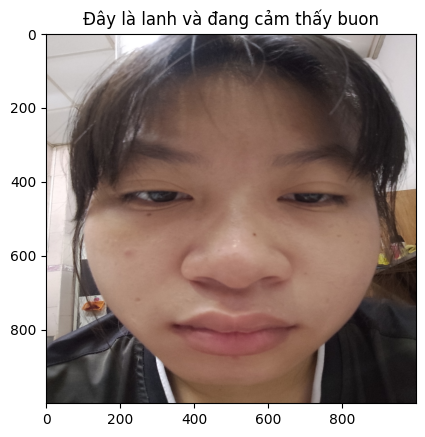

In [67]:
img = load_img('/content/Bản sao của IMG_20250420_130812.jpg',
target_size=(1000, 1000))
plt.imshow(img),
img = img.resize((64, 64))
img_array = img_to_array(img) / 255.0
img_array = img_array.reshape(1, 64, 64, 3)

prediction_emotion = model_emotion.predict(img_array)
class_names = list(train_generator_emotion.class_indices.keys())
predicted_class_emotion = class_names[np.argmax(prediction_emotion)]

img_face = img.resize((64, 64))
img_array_face = img_to_array(img_face) / 255.0
img_array_face = img_array_face.reshape(1, 64, 64, 3)

prediction = model_face.predict(img_array_face)
class_names_face = list(train_generator_face.class_indices.keys())
predicted_class_face = class_names_face[np.argmax(prediction)]


plt.title(f'Đây là {predicted_class_face} và đang cảm thấy {predicted_class_emotion}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Text(0.5, 1.0, 'Đây là thu và đang cảm thấy vui')

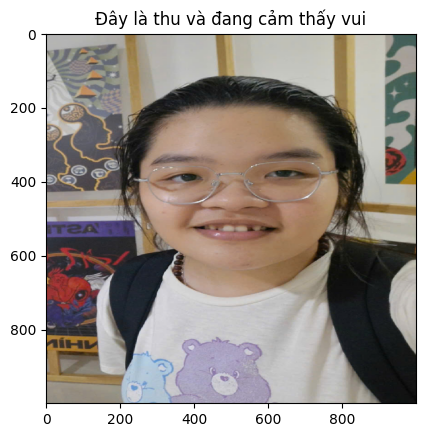

In [71]:
img = load_img('/content/z6517287823964_b21eb96ca73fe53db8e46647e4eab799.jpg',
target_size=(1000, 1000))
plt.imshow(img),
img = img.resize((64, 64))
img_array = img_to_array(img) / 255.0
img_array = img_array.reshape(1, 64, 64, 3)

prediction_emotion = model_emotion.predict(img_array)
class_names = list(train_generator_emotion.class_indices.keys())
predicted_class_emotion = class_names[np.argmax(prediction_emotion)]

img_face = img.resize((64, 64))
img_array_face = img_to_array(img_face) / 255.0
img_array_face = img_array_face.reshape(1, 64, 64, 3)

prediction = model_face.predict(img_array_face)
class_names_face = list(train_generator_face.class_indices.keys())
predicted_class_face = class_names_face[np.argmax(prediction)]


plt.title(f'Đây là {predicted_class_face} và đang cảm thấy {predicted_class_emotion}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Text(0.5, 1.0, 'Đây là mai và đang cảm thấy buon')

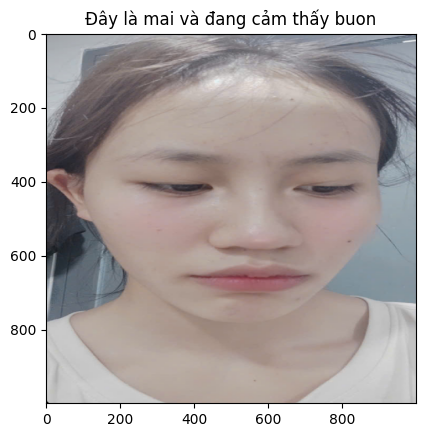

In [97]:
img = load_img('/content/z6518166309284_3552e0cb1e784630826817f288b3cc5c.jpg',
target_size=(1000, 1000))
plt.imshow(img),
img = img.resize((64, 64))
img_array = img_to_array(img) / 255.0
img_array = img_array.reshape(1, 64, 64, 3)

prediction_emotion = model_emotion.predict(img_array)
class_names = list(train_generator_emotion.class_indices.keys())
predicted_class_emotion = class_names[np.argmax(prediction_emotion)]

img_face = img.resize((64, 64))
img_array_face = img_to_array(img_face) / 255.0
img_array_face = img_array_face.reshape(1, 64, 64, 3)

prediction = model_face.predict(img_array_face)
class_names_face = list(train_generator_face.class_indices.keys())
predicted_class_face = class_names_face[np.argmax(prediction)]


plt.title(f'Đây là {predicted_class_face} và đang cảm thấy {predicted_class_emotion}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Text(0.5, 1.0, 'Đây là bthu và đang cảm thấy tuc gian')

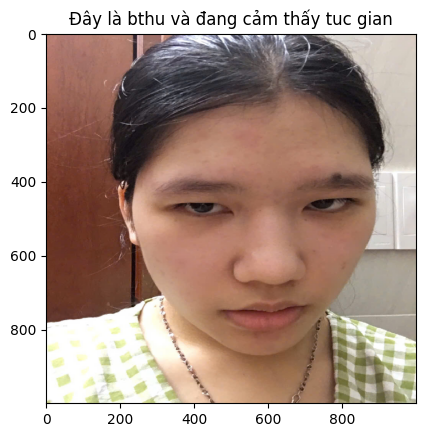

In [87]:
img = load_img('/content/z6519391554917_0b329decf4ea681fd738384828f8fb34.jpg',
target_size=(1000, 1000))
plt.imshow(img),
img = img.resize((64, 64))
img_array = img_to_array(img) / 255.0
img_array = img_array.reshape(1, 64, 64, 3)

prediction_emotion = model_emotion.predict(img_array)
class_names = list(train_generator_emotion.class_indices.keys())
predicted_class_emotion = class_names[np.argmax(prediction_emotion)]

img_face = img.resize((64, 64))
img_array_face = img_to_array(img_face) / 255.0
img_array_face = img_array_face.reshape(1, 64, 64, 3)

prediction = model_face.predict(img_array_face)
class_names_face = list(train_generator_face.class_indices.keys())
predicted_class_face = class_names_face[np.argmax(prediction)]


plt.title(f'Đây là {predicted_class_face} và đang cảm thấy {predicted_class_emotion}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Text(0.5, 1.0, 'Đây là my và đang cảm thấy khong cam xuc')

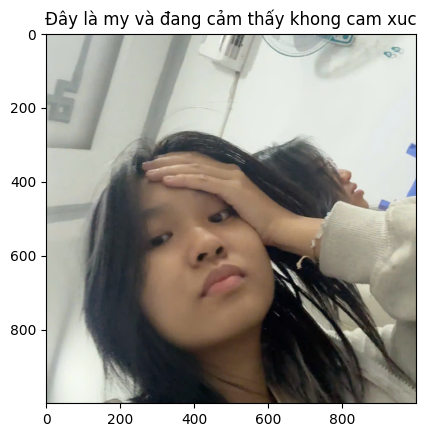

In [103]:
img = load_img('/content/z6517320415549_991a994baa7d2f9b3e362119ecd7983c.jpg',
target_size=(1000, 1000))
plt.imshow(img),
img = img.resize((64, 64))
img_array = img_to_array(img) / 255.0
img_array = img_array.reshape(1, 64, 64, 3)

prediction_emotion = model_emotion.predict(img_array)
class_names = list(train_generator_emotion.class_indices.keys())
predicted_class_emotion = class_names[np.argmax(prediction_emotion)]

img_face = img.resize((64, 64))
img_array_face = img_to_array(img_face) / 255.0
img_array_face = img_array_face.reshape(1, 64, 64, 3)

prediction = model_face.predict(img_array_face)
class_names_face = list(train_generator_face.class_indices.keys())
predicted_class_face = class_names_face[np.argmax(prediction)]


plt.title(f'Đây là {predicted_class_face} và đang cảm thấy {predicted_class_emotion}')